#### Import liabraries 

In [7]:
import pandas as pd
import numpy as np
import tensorflow 
from tensorflow import keras
import matplotlib.pyplot as plt

#### Load the data

In [12]:
data=pd.read_json('News_Category_Dataset_v3.json',lines=True)
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


#### Preprocessing of data

In [ ]:
# Keep only relevent columns
data=data[['headline','category']]
print(data.shape)
data.sample(5)

(209527, 6)

### Preprocess the data

In [15]:
# Keep only relevent columns
data=data[['headline','category']]
print(data.shape)


(209527, 2)


In [17]:
print(data['category'].duplicated().sum())
print(data['headline'].duplicated().sum())

209485
1531


In [19]:
data=data.drop_duplicates()
data=data.dropna()
print(data.shape)
data.head()

(208108, 2)


,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


### Text Normalization (Basic Cleaning)

In [24]:
import re
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]',"",text)
    return text
# remove punctuation/numbers
data['headline']=data['headline'].apply(clean_text)    

### Encode the Labels (Target)

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['label']=label_encoder.fit_transform(data['category'])

# Save the class for later

category_mapping =dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

### Tokenize and Pad the Text

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# parameters
max_words=10000
max_len=100

# Tokenize
tokenizer =Tokenizer(num_words=max_words,oov_token='<OOV>')
tokenizer.fit_on_texts(data['headline'])

sequences=tokenizer.texts_to_sequences(data['headline'])
padded=pad_sequences(sequences,maxlen=max_len,padding='post',truncating='post')

### Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split

X = padded
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Build the Deep Learning Model

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,GlobalAveragePooling1D
num_classes = len(label_encoder.classes_)

model=Sequential([
    Embedding(input_dim=10000,output_dim=64,input_length=100),
    GlobalAveragePooling1D(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(num_classes,activation='softmax')
    
    
])

C:\Users\Qcc\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [62]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


### Train the Model

In [71]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)


Epoch 1/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.5527 - loss: 1.6469 - val_accuracy: 0.5044 - val_loss: 1.8795
Epoch 2/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.5623 - loss: 1.5905 - val_accuracy: 0.5178 - val_loss: 1.8110
Epoch 3/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.5697 - loss: 1.5566 - val_accuracy: 0.5320 - val_loss: 1.7521
Epoch 4/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5810 - loss: 1.5116 - val_accuracy: 0.5286 - val_loss: 1.7567
Epoch 5/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5870 - loss: 1.4831 - val_accuracy: 0.5151 - val_loss: 1.8456
Epoch 6/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.5936 - loss: 1.4522 - val_accuracy: 0.5388 - val_loss: 1.7114
Epoch 7/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5973 - loss: 1.4300 - val_accuracy: 0.5434 - val_loss: 1.7285
Epoch 8/10
1301/1301 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.6045 -

In [73]:
 # Evaluate the Model
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Test Accuracy: {accuracy:.4f}")

1301/1301 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5360 - loss: 1.7183
Test Accuracy: 0.5426


In [75]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 42)                  │           2,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,977,920 (7.55 MB)

 Trainable params: 659,306 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,318,614 (5.03 MB)

### Visualize Training Progress

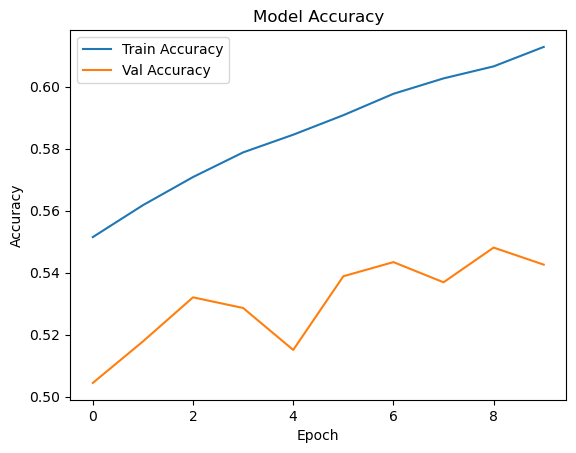

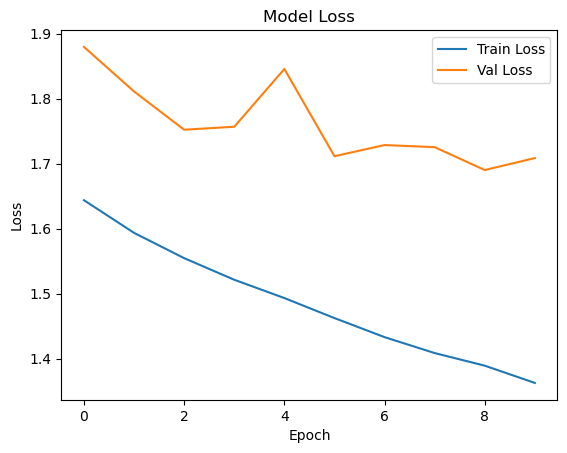

In [77]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Make Predictions on New Headlines

In [86]:
# Again use previous steps 
# step 1 clean the text
# Headlines
new_headlines="NASA announces new mission to Mars"
cleaned=clean_text(new_headlines)
# Tokenize and pad
sequence=tokenizer.texts_to_sequences([cleaned])
padded_sequence=pad_sequences(sequence,maxlen=100,padding='post')


### Predict and decode

In [90]:
# Predict
prediction = model.predict(padded_sequence)
predicted_label = prediction.argmax(axis=1)[0]

# Decode to category
predicted_category = label_encoder.inverse_transform([predicted_label])[0]

print(f"Predicted Category: {predicted_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Predicted Category: SCIENCE
